In [4]:
### Imports ###
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import os
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from GalPop import *
from tqdm.notebook import tqdm
cosmo = FlatLambdaCDM(H0=70, Om0=0.27)

In [5]:
ra_range = (149.65, 150.47)
dec_range = (2.02, 2.56)
z_range = (2.35, 2.70)

In [6]:
### PREP ###
sig_cube = fits.open(r"C:\Users\sikor\OneDrive\Desktop\benpy\FinalTry\Hyperion_interpolated_cube_sigma.fits")

sigs = np.arange(2.0, 5.5, 0.5)
p_sums = []
for s in sigs:
    p_sums.append(np.genfromtxt(rf"C:\Users\sikor\OneDrive\Desktop\BigData\Hyperion\HyperionPeaks\peaks_sig{s}.dat", dtype=float))


cosmos_file = fits.open(r"C:/Users/sikor/OneDrive/Desktop/BigData/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0.fits")
c20p = cosmos_file[1].data

In [7]:
gp_folder = "LP_GalPops3/"

tot_pops = [GalPop.loadFile(gp_folder + f) for f in sorted(os.listdir(gp_folder))]

In [8]:
t = tot_pops[92]

In [9]:
pk_path = r"C:\Users\sikor\OneDrive\Desktop\BigData\Hyperion\HyperionPeaks\\"
t.assignPeaks(sigs, sig_cube, pk_path, [f'peaks_sig{s}.dat' for s in sigs], [f'sig{s}_peaks' for s in sigs] , overwrite=True)
pk_sum = np.genfromtxt(pk_path, dtype=float, skip_header=0)    # Peak summary file

t.subPop('test', [2.0, 4.0], 13., [2.,3.], pk_path, 'peaks_sig2.0.dat', sig_cube, pk_folder='sig2.0_peaks' ,cosmo=cosmo )

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sikor\\OneDrive\\Desktop\\BigData\\Hyperion\\HyperionPeaks\\\\'

In [12]:
len(t.coords[:,2][t.subpops['test']])

35193

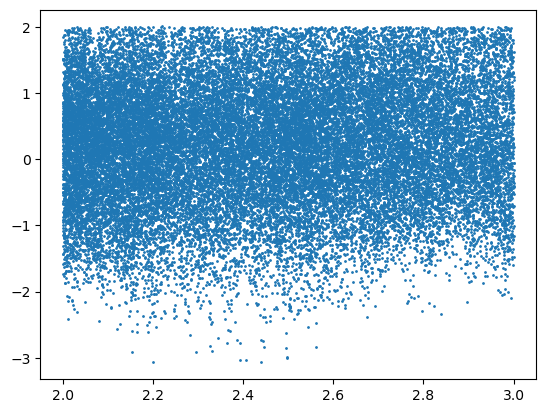

In [13]:
pk_info = r"C:\Users\sikor\OneDrive\Desktop\BigData\Hyperion\HyperionPeaks\peaks_sig2.0.dat"
np.load()

b = np.where(t.pks[2.0] <0)
plt.scatter(t.coords[:,2][b], t.n_sigmas[b], s=1)

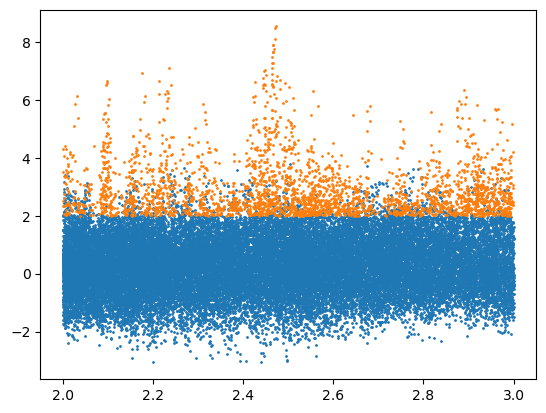

In [14]:
plt.scatter(t.coords[:,2][t.subpops['test']], t.n_sigmas[t.subpops['test']], s=1)
plt.scatter(t.coords[:,2][t.subpops['test']==False], t.n_sigmas[t.subpops['test']==False], s=1)

plt.show()

In [4]:
# Compile populations
gp_folder = "LP_GalPops3/"

tot_pops = [GalPop.loadFile(gp_folder + f) for f in sorted(os.listdir(gp_folder))]
h_pops = []
sigs = np.arange(2.0, 5.5, 0.5)
pk_path = "HyperionPeaks/"
pk_sums = [f"peaks_sig{s}.dat" for s in sigs]



for t in tot_pops:


    t.subPop("field1", [-99, 4.0], 13. , [2.15, 2.25], pk_path, pk_sums[2], sig_cube, cosmo = cosmo)
    t.subPop("field2", [-99, 4.0], 13. , [2.8, 2.9], pk_path, pk_sums[2], sig_cube, cosmo = cosmo)

    # h_objs = np.where(t.pks[2.0] == 1)
    h_objs = np.where((t.pks[2.0] == 1) & (t.mags['IRAC'] <= 25.))

    
    temp = {}
    temp_misc = {}
    for k in t.pks:
        temp[k] = t.pks[k][h_objs]
    for m in t.misc:
        temp_misc[m] = t.misc[m][h_objs]

    h = GalPop(IDs = t.IDs[h_objs], ms= t.ms[h_objs], SFRs = t.SFRs[h_objs],
                    coords=t.coords[h_objs],obs_type=t.obs_type[h_objs],pks=temp, misc=temp_misc )
    
    for si, sigma in enumerate(sigs):
        t.subPop(f"o{sigma}", [sigma, np.inf], 13., [2.35, 2.7], pk_path, pk_sums[si], sig_cube)

        h.subPop(f"o{sigma}", [sigma, np.inf], 13., [2.35, 2.7], pk_path, pk_sums[si], sig_cube)

    h.subPop(f"23", [2.0, 3.0], 13., [2.35, 2.7], pk_path, "peaks_sig2.0.dat", sig_cube)
    h.subPop(f"34", [3.0, 4.0], 13., [2.35, 2.7], pk_path, "peaks_sig3.0.dat", sig_cube)

    h.vols['23'] -= h.vols['o3.0']
    h.vols['34'] -= h.vols['o4.0']


    h_pops.append(h)

KeyboardInterrupt: 

In [147]:
list(h_pops[0].subpops.keys())

['o2.0', 'o2.5', 'o3.0', 'o3.5', 'o4.0', 'o4.5', 'o5.0', '23', '34']

In [148]:
test = np.load(rf"C:/Users/sikor/OneDrive/Desktop/BigData/COSMOS2020/C20_MC_100_0.npy")

In [149]:
test.shape

(70049,)

In [150]:
np.where(test["ID"] == 827530    )

(array([34682], dtype=int64),)

In [151]:
test['MC_iter1'][34682]

2.1342088492461793

In [152]:
len(tot_pops[0].IDs)

38001

In [153]:
np.unique(tot_pops[0].IDs)

array([ 333946,  333976,  334210, ..., 1380578, 1380611, 1386724],
      dtype=int64)

In [154]:
t = tot_pops[1]

t_ids, c = np.unique(t.IDs, return_counts=True)

In [155]:
bad_ids = t_ids[np.where(c>1)]

print(bad_ids)

[ 757257  827530  849626  856331  872598  896136  896175  912121  941095
  941998  950520  973613 1017359 1017620 1073002 1083244]


In [156]:
bad_ids = t_ids[np.where(c>1)]

print(bad_ids)

[ 757257  827530  849626  856331  872598  896136  896175  912121  941095
  941998  950520  973613 1017359 1017620 1073002 1083244]


In [157]:
idxs = np.where(t.IDs == bad_ids[1])[0]

In [158]:
t.coords[idxs]

array([[150.09700628,   2.20913029,   2.11452959],
       [150.09700628,   2.20913029,   2.12054687]])

In [159]:
t.obs_type[idxs]

array([0., 0.])

In [160]:
d1 = GalPop.loadFile('GalPops_phot/MC_0.npy')
d2 = GalPop.loadFile('GalPops_spec/MC_0.npy')
d = GalPop.loadFile('GalPops_tot/MC_0.npy')

print(len(d1.IDs) + len(d2.IDs))
print(len(d.IDs))

40176
38001


In [161]:
do = np.concatenate((d1.IDs, d2.IDs))

print(len(np.unique(do)))

37986


In [162]:
len(d2.IDs)

2857

In [163]:
print(len(d1.IDs) - len(d1.IDs[np.in1d(d1.IDs, d2.IDs)]) + len(np.unique(d2.IDs)))

37986


In [164]:
print(len(d1.IDs) + len(d2.IDs))
d1.del_objs(d2.IDs)       # Delete the objects
print(len(d1.IDs) + len(d2.IDs))
# Combine
new_tot = d1.combine(d2)


print(len(new_tot.IDs))

40176
38001
38001


In [165]:
MCs = np.load(r"C:/Users/sikor/OneDrive/Desktop/BigData/COSMOS2020/MC_spec.npy", allow_pickle=True)
print(MCs.shape)

(24275,)


In [166]:
len(np.unique(MCs['ID']))

24234

In [167]:
### LOAD SPECTRA ###

# GROUND-BASED (GB)
specz_cat = np.loadtxt("./Data/master_specz_COSMOS_BF_v4b.cat", dtype=object)   # Load in the data
# Fix up the formatting for the spec data-file:
new_array = []
for idx in range(specz_cat.shape[1]):
    try:
        col = specz_cat[:,idx].astype(np.float32)
    except:
        col = specz_cat[:,idx]
    new_array.append(col)

c20s = np.array(new_array, dtype=object)
c20s = np.transpose(c20s)

print(f"Number of C20 spectra: {c20s.shape[0]}")
gd = np.where(c20s[:,0] > 0)
print(len(c20s[gd][:,0]), len(np.unique(c20s[gd][:,0])))

# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

# GRISM
# Need blended flags from griz_cat
griz_cat = np.loadtxt("./Data/HST_Hyp_zcat.v1.2.cat",  usecols=range(16), dtype=object)   # Load in the data
new_array = []
for idx in range(griz_cat.shape[1]):
    try:
        col = griz_cat[:,idx].astype(np.float32)
    except:
        col = griz_cat[:,idx]
    new_array.append(col)

griz = np.array(new_array, dtype=object)
griz = np.transpose(griz)

print(f"Number of Grism redshifts: {griz.shape[0]}")
gd = np.where(griz[:,4] > 0)
print(len(griz[gd][:,4]), len(np.unique(griz[gd][:,4])))
print(len(griz[gd][:,4])- len(np.unique(griz[gd][:,4])), len(np.where(griz[:,5]==1)[0]))


Number of C20 spectra: 42776
40214 40214
Number of Grism redshifts: 12764
12711 12589
122 240


In [168]:
# xs = (149.6, 150.57)
# ys = (1.75, 2.5)
# zs = (2.3, 2.75)

# h_pops[2].popPlot2('o2.0', xs, ys, zs)

In [202]:
### BUILD SMFs ###
sp_keys = [['field1', 'field2']] + ['o2.0', 'o3.0']
smf_keys = ['field', 'o2.0', 'o3.0']

for idx, t in enumerate(tot_pops):
    # Make SMFs #    
    m_range = [9.5, 11.75, 0.25]
    t.make_SMF(sp_keys, smf_keys ,m_range)
    t.make_SMF(['o4.0', ['field1', 'field2']], ['o4.0', 'f2'] ,[9.5, 11.75, 1/3])




    # Make fits #
    # t.fit_SMF(smf_keys, smf_keys, [1 for s in smf_keys], p0=[10, 1, -1], maxfev=3000)
    
    # t.SMF_plot(smf_keys, smf_keys, smf_keys, smf_keys, title="", plot="None")

sp_keys += ['23', '34']
smf_keys += ['23', '34']

for idx, h in enumerate(h_pops):
    # Make SMFs #
    m_range = [9.5, 11.75, 0.25]
    h.make_SMF(sp_keys[1:], smf_keys[1:] ,m_range)
    h.make_SMF(['o4.0'], ['o4.0'] ,[9.5, 11.75, 1/3])


In [170]:
def schechter(M, phi_star, alpha, m_star):
  return np.log(10)*phi_star*10**((M-m_star)*(1+alpha))*np.exp(-10**(M-m_star))

In [171]:
def fschechter(M, phi_star, m_star):
  return schechter(M, phi_star, -1.3, m_star)

In [172]:
def Dschechter(M, M_star, phi_s1, phi_s2, alpha_1, alpha_2):
    return np.log(10)*np.exp(-10**(M-M_star))*(phi_s1*(10**(M-M_star))**(alpha_1+1) \
    +phi_s2*(10**(M-M_star))**(alpha_2+1) )

In [173]:
def C20field(m, fn):
    if fn == 0:
        return Dschechter(m, 10.78,0.27e-3, 0.27e-3, -1.46, 0.07 )
    else:
        return schechter(m, 0.24e-3, -1.46, 10.97)

In [174]:
# for ki, key in enumerate(sp_keys):
#     if ki == 0: key = 'field1'
#     all_ms, all_vs = [], []

#     for t in tot_pops:

#         all_ms.append(t.ms[t.subpops[key]])

#         all_vs.append(t.vols[key])

#     all_ms = np.concatenate(all_ms)

#     ms = []
#     ns = []

#     for m in np.arange(9, 12, 0.25):

#         ni = np.where((all_ms > m) & (all_ms <=( m +0.25)))[0]

#         ns.append(len(ni) / np.mean(all_vs) / 0.25)
#         ms.append(np.mean(all_ms[ni]))

#     plt.scatter(ms, ns, label=key)

# plt.yscale('log')
# plt.legend()
# plt.show()

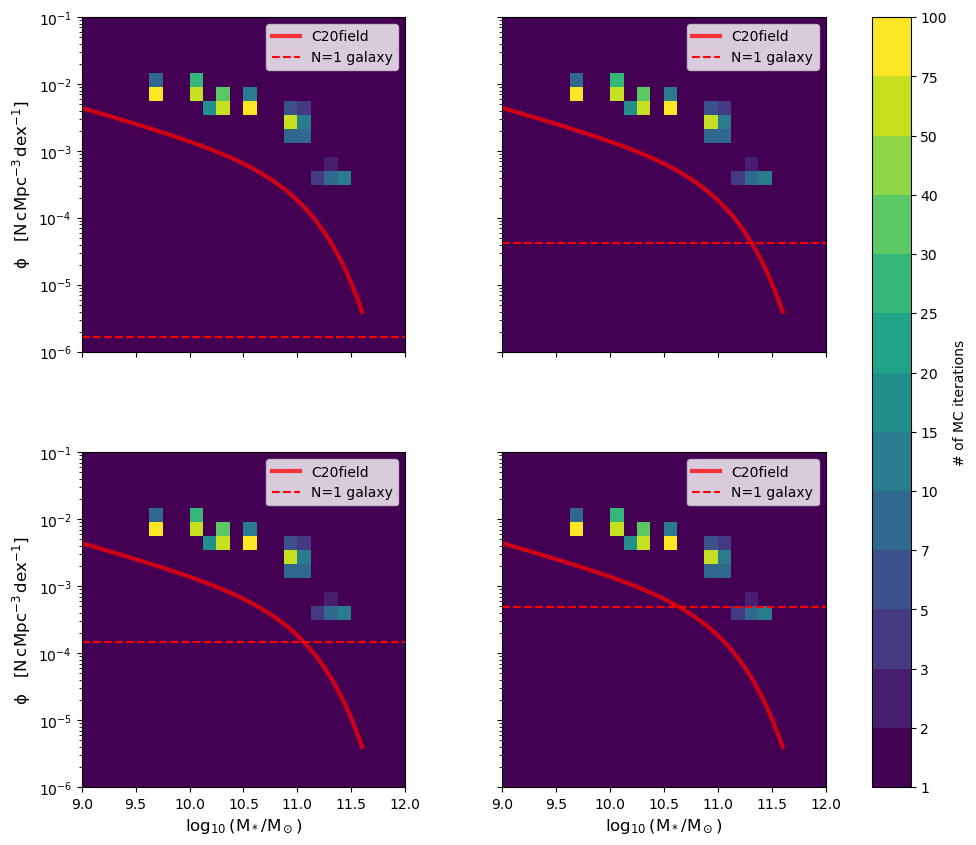

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, BoundaryNorm

# Assuming you have the required functions and data (tot_pops, h_pops, C20field) defined above

# Titles for the subplots
titles = ["Field samples", r"$\sigma \geq 2.0$", r"$\sigma \geq 3.0$", r"$\sigma \geq 4.0$"]

# Create a figure with 4 subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Define bins for the histograms
xbin = np.linspace(9, 12, 25)
ybin = np.logspace(-6, -1, 25)

# Initialize a variable to collect all histogram data for a shared colorbar
all_hist = []

for ki, key in enumerate(['field', 'o2.0', 'o3.0', 'o4.0']):
    tot_ms  = []
    tot_ns = []
    vols = []
    
    for idx, t in enumerate(tot_pops):
        if ki == 0:  # field
            vols.append(t.vols['field1'] + t.vols['field2'])
            tot_ms = np.concatenate((tot_ms, t.smfs[key][:, 0]), axis=0)
            tot_ns = np.concatenate((tot_ns, t.smfs[key][:, 2]), axis=0)
        else:
            vols.append(h_pops[idx].vols[key])
            tot_ms = np.concatenate((tot_ms, h_pops[idx].smfs[key][:, 0]), axis=0)
            tot_ns = np.concatenate((tot_ns, h_pops[idx].smfs[key][:, 2]), axis=0)

    ms = np.linspace(9, 11.6, 1000)
    ax = axs[ki // 2, ki % 2]  # Get the corresponding subplot

    if ki >= 0:
        ax.plot(ms, C20field(ms, 1), color='red', lw='3', alpha=0.75, label="C20field")

    # Create a 2D histogram
    hist, xedges, yedges, im = ax.hist2d(tot_ms, tot_ns, bins=(xbin, ybin), norm=LogNorm())

    # Collect histogram data for the shared colorbar
    all_hist.append(hist)
    
    # Set axis labels and title
    ax.set(yscale='log', ylim=(1e-6, 1e-1))

    ax.hlines(y=1/np.mean(vols)/0.25, xmin=9, xmax=12, color='r', ls='dashed', label="N=1 galaxy")
    ax.legend(loc="upper right")

# Calculate levels for the shared colorbar
log_min = np.log10(np.min([hist[hist > 0].min() for hist in all_hist]))
log_max = np.log10(np.max([hist.max() for hist in all_hist]))
levels = [1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 75, 100]

axs[0,0].set_ylabel(r"$\rm \phi \quad [N\, cMpc^{-3}\,dex^{-1}]$", fontsize=12)
axs[1,0].set_ylabel(r"$\rm \phi \quad [N\, cMpc^{-3}\,dex^{-1}]$", fontsize=12)

axs[1,0].set_xlabel(r"$\rm \log_{10}(M_*/M_\odot)$", fontsize=12)
axs[1,1].set_xlabel(r"$\rm \log_{10}(M_*/M_\odot)$", fontsize=12)

# Normalize with the same levels for all subplots
norm = BoundaryNorm(levels, ncolors=plt.get_cmap('viridis').N, clip=True)

# Redraw the histograms with the discrete norm and add a colorbar
for ax, hist in zip(axs.flatten(), all_hist):
    h = ax.hist2d(tot_ms, tot_ns, bins=(xbin, ybin), norm=norm, cmap='viridis')

# Create a shared colorbar with the correct levels and norm
cbar = fig.colorbar(h[3], ax=axs, orientation='vertical', ticks=levels, label="# of MC iterations")



# Show the plot
plt.show()


In [176]:
vols

[8393.8173,
 8062.5517,
 8223.6868,
 8223.6868,
 8393.8173,
 8062.5517,
 8062.5517,
 8393.8173,
 8223.6868,
 8393.8173,
 8393.8173,
 8062.5517,
 8393.8173,
 8062.5517,
 8393.8173,
 8232.682200000001,
 8062.5517,
 8393.8173,
 8393.8173,
 8232.682200000001,
 8062.5517,
 8223.6868,
 8223.6868,
 8393.8173,
 8232.682200000001,
 8062.5517,
 8393.8173,
 8393.8173,
 8393.8173,
 8223.6868,
 8223.6868,
 8062.5517,
 8393.8173,
 8223.6868,
 8393.8173,
 8223.6868,
 8232.682200000001,
 8393.8173,
 8393.8173,
 8062.5517,
 8223.6868,
 8223.6868,
 8393.8173,
 8223.6868,
 8223.6868,
 8223.6868,
 8062.5517,
 8393.8173,
 8393.8173,
 8223.6868,
 8223.6868,
 8393.8173,
 8062.5517,
 8232.682200000001,
 8232.682200000001,
 8223.6868,
 8393.8173,
 8232.682200000001,
 8232.682200000001,
 8223.6868,
 8223.6868,
 8223.6868,
 8393.8173,
 8232.682200000001,
 8223.6868,
 8393.8173,
 8062.5517,
 8062.5517,
 8393.8173,
 8062.5517,
 8393.8173,
 8223.6868,
 8393.8173,
 8223.6868,
 8393.8173,
 8393.8173,
 8232.6822000000

In [177]:
def nmad(vals):
    med = np.nanmedian(vals)
    diff = vals - med
    return 1.48 * np.nanmedian(np.abs(diff - np.nanmedian(diff)))

array([[9.61033766e+00, 1.32600000e+03, 2.19666750e-03, 4.54934673e-08,
        2.50771749e-10],
       [9.86688808e+00, 9.00000000e+02, 1.49095079e-03, 5.52203996e-08,
        1.69162311e-10],
       [1.01088075e+01, 5.86000000e+02, 9.70774625e-04, 6.84340105e-08,
        1.08986555e-10],
       [1.03626195e+01, 3.77000000e+02, 6.24542719e-04, 8.53198581e-08,
        6.80620281e-11],
       [1.05985469e+01, 3.23000000e+02, 5.35085672e-04, 9.21763567e-08,
        3.83307113e-11],
       [1.08598822e+01, 1.96000000e+02, 3.24695950e-04, 1.18329428e-07,
        2.22062247e-11],
       [1.10797381e+01, 8.70000000e+01, 1.44125243e-04, 1.77607448e-07,
        1.39669532e-11],
       [1.13216501e+01, 3.50000000e+01, 5.79814196e-05, 2.80018534e-07,
        8.59493296e-12],
       [1.15986612e+01, 4.00000000e+00, 6.62644795e-06, 8.28305994e-07,
        5.77361524e-12]])

Average Volume =  2415541.6234356444
[1328.0, 870.0, 593.5, 417.0, 300.0, 188.5, 86.0, 31.0, 4.0, 0.0]
3818.0


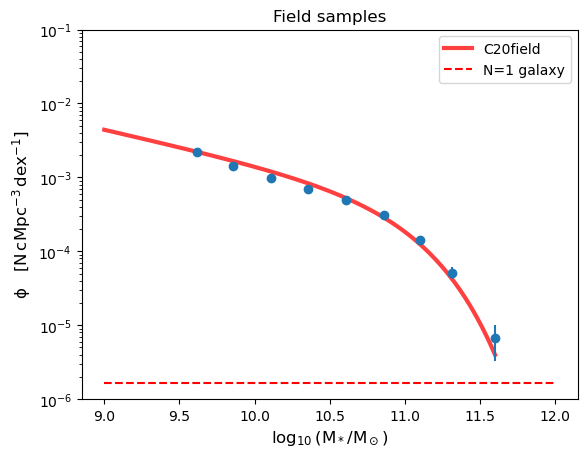

Average Volume =  95579.13570000003
[110.0, 83.0, 72.0, 38.0, 29.0, 23.0, 13.0, 2.0, 0.0, 0.0]
370.0


C:\Users\sikor\AppData\Local\Temp\ipykernel_23268\958511550.py:69: RuntimeWarning: Mean of empty slice
  plot_sfr.append(np.nanmean(ssfrs[:,i]))


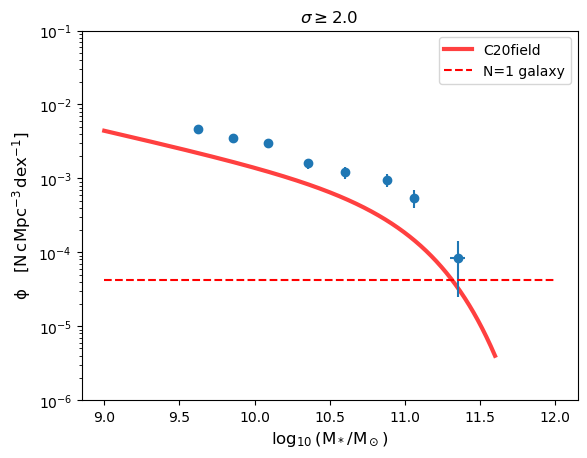

Average Volume =  27380.599148999998
[43.0, 31.5, 37.0, 17.0, 16.0, 10.5, 7.0, 0.0, 0.0, 0.0]
162.0


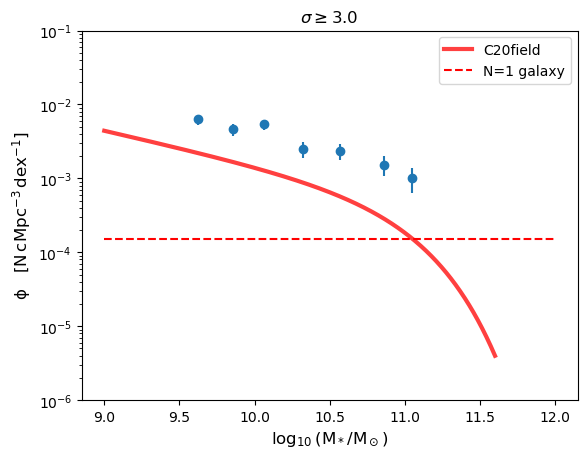

Average Volume =  8252.534672999998
[21.0, 24.0, 15.0, 14.0, 7.0, 0.0, 0.0]
81.0


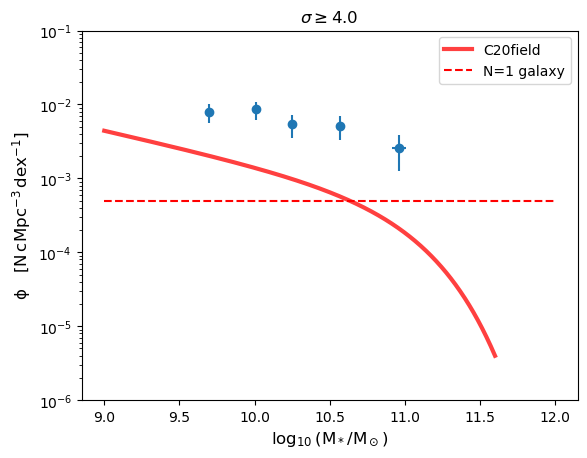

Average Volume =  68198.53655100001
[66.5, 49.0, 35.0, 19.0, 13.0, 12.0, 5.5, 2.0, 0.0, 0.0]
202.0


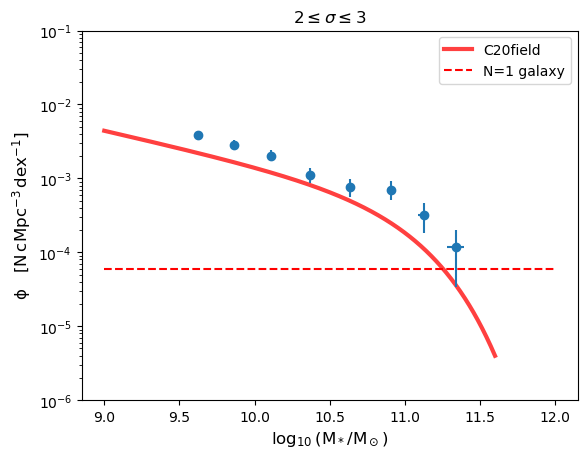

Average Volume =  8482.536927000001
[28.0, 17.0, 14.0, 8.0, 4.0, 4.0, 3.0, 0.0, 0.0, 0.0]
78.0


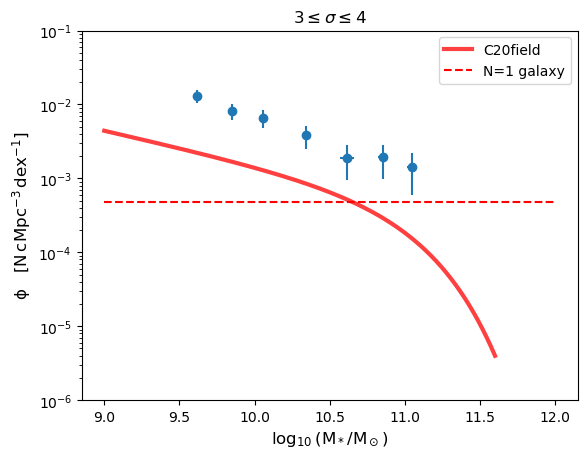

Average Volume =  2415541.6234356444
[1677.5, 951.0, 584.0, 371.0, 187.0, 49.0, 4.0]
3823.5


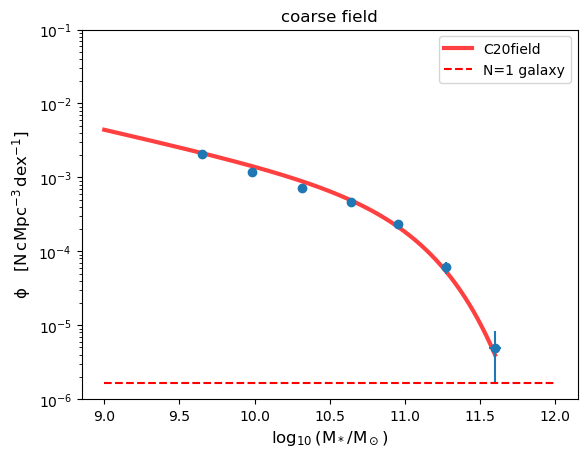

C:\Users\sikor\AppData\Local\Temp\ipykernel_23268\958511550.py:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_smfs = np.array(all_smfs)


In [204]:
all_smfs = []

titles = ["Field samples", r"$\sigma \geq 2.0$", r"$\sigma \geq 3.0$", r"$\sigma \geq 4.0$",  
          r"$2 \leq \sigma \leq 3$", r"$3 \leq \sigma \leq 4$", 'coarse field']
for ki, key in enumerate(['field', 'o2.0', 'o3.0', 'o4.0', '23', '34', 'f2']):

    if ki in [3,6]:
        tot_ms  = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['o4.0'])))
        tot_ns = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['o4.0'])))
        tot_errs = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['o4.0'])))
        tot_Ns = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['o4.0'])))
        ssfrs = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['o4.0'])))

    else:
        tot_ms  = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['field'])))
        tot_ns = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['field'])))
        tot_errs = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['field'])))
        tot_Ns = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['field'])))
        ssfrs = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs['field'])))

    vols = []


    for idx, t in enumerate(tot_pops):


        if ki in [0,6]:

            tot_ms[idx]  = t.smfs[key][:,0]
            tot_errs[idx] = t.smfs[key][:,3]
            tot_Ns[idx] = t.smfs[key][:,1]
            tot_ns[idx] = t.smfs[key][:,2]
            vols.append(t.vols['field1'] + t.vols['field2'])

            ssfrs[idx] = t.smfs[key][:,4]



        else: 

            tot_ms[idx]  = h_pops[idx].smfs[key][:,0]
            tot_errs[idx] = h_pops[idx].smfs[key][:,3]
            tot_Ns[idx] = h_pops[idx].smfs[key][:,1]

            tot_ns[idx] = h_pops[idx].smfs[key][:,2]
            vols.append(h_pops[idx].vols[key])

            ssfrs[idx] = h_pops[idx].smfs[key][:,4]


    print("Average Volume = ", np.mean(vols))
    plot_m = []
    plot_n = []
    yerror = []
    xerror = []
    m_counts = []
    plot_sfr = []
    plot_qf = []
    plot_Ns = []
    for i in range(tot_ms.shape[1]):
        plot_m.append(np.nanmedian(tot_ms[:,i]))
        xerror.append(np.std(tot_ms[:,i]))
        plot_n.append(np.median(tot_ns[:,i]))
        plot_Ns.append(np.nanmedian(tot_Ns[:,i]))

        p_err = np.sqrt(np.nanmedian(tot_Ns[:,i])) / np.median(vols) / 0.25
        yerror.append(  nmad(tot_ns[:,i])**2 + p_err)

        plot_sfr.append(np.nanmean(ssfrs[:,i]))
        qgs = np.where(ssfrs[:,i] < 10**-11)[0]
        plot_qf.append(len(qgs)/len(ssfrs[:,i]))

        mc = len(tot_ns) - len(tot_ns[np.isnan(tot_ns[:,i])])
        
        m_counts.append(mc)

        if i == (tot_ms.shape[1] -1):
            print(plot_Ns)
            print(sum(plot_Ns))
    
    temp = np.c_[plot_m, plot_n, yerror, xerror, plot_sfr, plot_qf, plot_Ns]
    all_smfs.append(temp)
    xbin = np.linspace(9, 12, 25)
    ybin = np.logspace(-6, -1, 25)

    fig, ax = plt.subplots()
    ms = np.linspace(9, 11.6, 1000)
    ax.plot(ms, C20field(ms, 1), color='red', lw='3', alpha=0.75, label="C20field")

    ax.errorbar(plot_m, plot_n,yerr=yerror, xerr=xerror, marker='o', ls="")
    # Plot the 2D histogram again with the discrete norm 
    ax.set(yscale='log', ylim=(1e-6, 1e-1), title=titles[ki])
    ax.set_ylabel(r"$\rm \phi \quad [N\, cMpc^{-3}\,dex^{-1}]$", fontsize=12)
    ax.set_xlabel(r"$\rm \log_{10}(M_*/M_\odot)$", fontsize=12)
    ax.hlines(y=1/np.min(vols)/0.25, xmin=9, xmax=12, color='r', ls='dashed', label="N=1 galaxy")
    ax.legend(loc="upper right")

    plt.show()

all_smfs = np.array(all_smfs)

In [121]:
print(all_smfs.shape)

(6, 9, 7)


In [ ]:
### Plot all smfs ###
colors = ['tab:purple', 'tab:blue','tab:green', 'tab:orange', 'tab:red']  
shapes = ["o", "H", "P", "s", "D", (5,1,0)]
labels = ['Field', r'$n_\sigma \geq 2$', r'$n_\sigma \geq 3$', r'$n_\sigma \geq 4$']
fig, axs = plt.subplots(1,2, sharey=True)
fig.set_size_inches(10, 5)

ms = np.linspace(9.5, 11.6, 100)

for i, s in enumerate(all_smfs[:-3]):
    
    axs[0].errorbar(s[:,0]+0.05*i, s[:,1], yerr=s[:,2], ls='',marker=shapes[i], color=colors[i], label=labels[i])
    # axs[0].plot(s[1:][:,0]+0.05*i, s[1:][:,1], ls='',marker=shapes[i], color=colors[i], label=labels[i])
    last = np.where(s[:,1] ==0)[0]

    if len(last) != 0: last_i = last[0] -1
    else: last_i = len(s)

    print(labels[i])
    f_params, f_err = curve_fit(schechter, s[:,0][:last_i], s[:,1][:last_i], sigma=s[ :,-1][:last_i],
                                  p0=[0.5, -1, 11], maxfev=2000)
    axs[1].plot(ms, schechter(ms, *f_params),color=colors[i], label=labels[i])



    # print(round(f_params[2], 2),round(f_params[1], 2), round(f_params[0]/10**-3, 2))
    # print(round(np.sqrt(f_err[2,2]),2),round( np.sqrt(f_err[1,1]),2),round( np.sqrt(f_err[0,0])/10**-3,2))
    # print()


for i, s in enumerate(all_smfs[:-2]):

    f_params, f_err = curve_fit(fschechter, s[:,0][:last_i], s[:,1][:last_i], sigma=s[:,-1][:last_i],
                                  p0=[0.5, 11], maxfev=2000)
    axs[1].plot(ms, fschechter(ms, *f_params),color=colors[i], label= r'  ($\alpha=-1.3$)',ls='--' )
    print()
    print(round(f_params[1], 2), round(f_params[0]/10**-3, 2))
    print(round( np.sqrt(f_err[1,1]),2),round( np.sqrt(f_err[0,0])/10**-3,2))



axs[0].plot(ms, C20field(ms, 1), color='red', lw='1', ls='dashdot', alpha=0.75, label="COSMOS2020")

axs[0].set(yscale='log')
axs[0].set_xlabel(r'$\log(M_*/M_\odot)$', fontsize = 15)
axs[0].set_ylabel(r"$\rm \phi \quad [N\, cMpc^{-3}\,dex^{-1}]$", fontsize = 15)
axs[0].legend(loc='lower left', fontsize=12) 

axs[1].set(yscale='log')
axs[1].set_xlabel(r'$\log(M_*/M_\odot)$', fontsize = 15)
axs[1].legend(loc='lower left', ncols=1, fontsize=12)

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

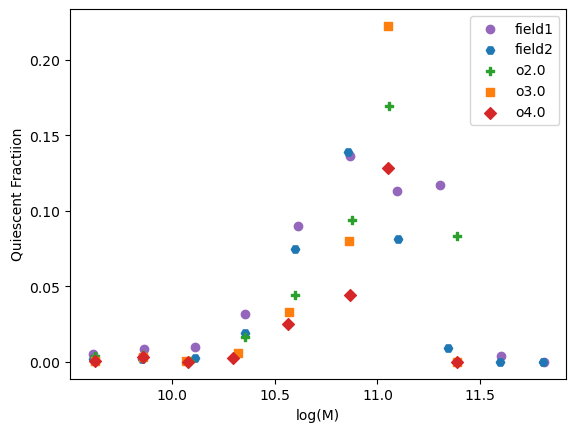

In [123]:
### Plot all smfs ###
colors = ['tab:purple', 'tab:blue','tab:green', 'tab:orange', 'tab:red']  
shapes = ["o", "H", "P", "s", "D", (5,1,0)]
labels = ['field1', 'field2', "o2.0", "o3.0", "o4.0"]


m_a = []

qfs = []

for ki, k in enumerate(['field1','field2']):
    new_q = []
    new_ma = []
    for m in np.arange(9.5,12,0.25):

        ms = []
        sfrs = []
        ssfrs = []

        for t in tot_pops:
            g_idxs = t.subpops[k]
            gms = np.where((t.ms[g_idxs] >= m) & (t.ms[g_idxs] < m+0.25) )
            ms.append(t.ms[g_idxs][gms])
            sfrs.append(t.SFRs[g_idxs][gms])
            ssfrs.append(t.SFRs[g_idxs][gms] / t.ms[g_idxs][gms])
        ms = np.concatenate(ms)
        sfrs = np.concatenate(sfrs)
        ssfrs = np.concatenate(ssfrs)
        qg = np.where(ssfrs <= 10**-11)[0]
        new_q.append(len(qg) / len(ssfrs))
        new_ma.append(np.median(ms))

    m_a.append(new_ma)
    qfs.append(new_q)



for ki, k in enumerate(['o2.0','o3.0', 'o4.0']):
    new_q = []
    new_ma = []
    for m in np.arange(9.5,12,0.25):

        ms = []
        sfrs = []
        ssfrs = []

        for h in h_pops:
            g_idxs = h.subpops[k]
            gms = np.where((h.ms[g_idxs] >= m) & (h.ms[g_idxs] < m+0.25) )
            ms.append(h.ms[g_idxs][gms])
            sfrs.append(h.SFRs[g_idxs][gms])
            ssfrs.append(h.SFRs[g_idxs][gms] / h.ms[g_idxs][gms])
        ms = np.concatenate(ms)
        sfrs = np.concatenate(sfrs)
        ssfrs = np.concatenate(ssfrs)
        qg = np.where(ssfrs <= 10**-11)[0]
        if len(ssfrs) !=0:
            new_q.append(len(qg) / len(ssfrs))
            new_ma.append(np.median(ms))
        else:
            new_q.append(np.nan)
            new_ma.append(np.nan)

    m_a.append(new_ma)
    qfs.append(new_q)




for idx in range(5):
    plt.scatter(m_a[idx], qfs[idx], marker=shapes[idx], color=colors[idx], label=labels[idx])

plt.legend()
plt.xlabel("log(M)")
plt.ylabel("Quiescent Fractiion")
plt.show()

---
---
---

In [124]:
def linear(x, m, b):
    return m*x + b

(100, 10)
10 10
(100, 10)
10 10
(100, 7)
7 7


C:\Users\sikor\AppData\Local\Temp\ipykernel_23268\194996253.py:30: RuntimeWarning: invalid value encountered in divide
  ye = tot_ns[:,i]/norms[i]
C:\Users\sikor\AppData\Local\Temp\ipykernel_23268\194996253.py:47: RuntimeWarning: invalid value encountered in divide
  min_n = min(min_n, min(data[:,1]/norms))
C:\Users\sikor\AppData\Local\Temp\ipykernel_23268\194996253.py:48: RuntimeWarning: invalid value encountered in divide
  max_n = max(max_n, max(data[:,1]/norms))


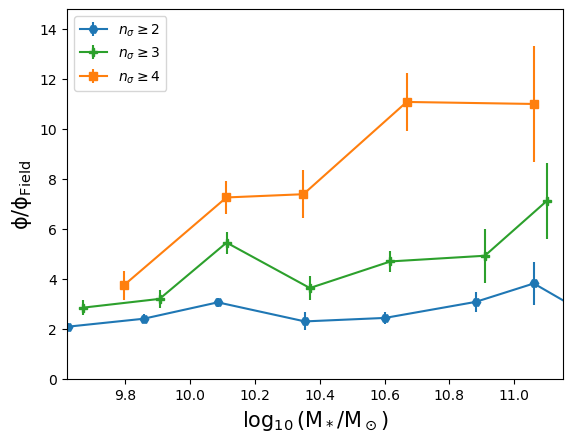

In [209]:
colors = ['tab:purple', 'tab:blue','tab:green', 'tab:orange', 'tab:red']  
shapes = ["o", "H", "P", "s", "D", (5,1,0)]
labels = ['Field', r'$n_\sigma \geq 2$', r'$n_\sigma \geq 3$', r'$n_\sigma \geq 4$']
min_m, max_m = 99, -99  # For plot limits
min_n, max_n = 0.2, 1


for ki, key in enumerate(['o2.0', 'o3.0', 'o4.0']):
    if ki != 2: norms = all_smfs[0][:,1]
    else: norms = all_smfs[-1][:,1]

    tot_ns = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs[key])))
    tot_errs = np.zeros(shape=(len(tot_pops), len(tot_pops[0].smfs[key])))

    for idxs, t in enumerate(tot_pops):

            tot_ns[idxs] = h_pops[idxs].smfs[key][:,2]

    print(tot_ns.shape)
    data = all_smfs[ki+1]
    # Set length of normalizing array
    print(len(norms), len(data))
    if len(norms) > len(data): 
        norms = norms[:len(data)]   # Shorten normalizing array
    else:   # Shorten data
        data = data[:len(norms)]

    plot_err = []
    for i in range(len(tot_pops[0].smfs[key])):
        ye = tot_ns[:,i]/norms[i]
        plot_err.append(nmad(ye))

    last = np.where(data[:,1] ==0)[0]

    if len(last) != 0: last_i = last[0]
    else: last_i = len(data)


    plt.errorbar(data[:,0][:last_i]+0.05*ki, data[:,1][:last_i] / norms[:last_i], yerr= plot_err[:last_i], 
                    label=labels[ki+1], marker=shapes[ki+1], color=colors[ki+1])

    # fp, fe = curve_fit(linear, data[:,0][:last_i], data[:,1][:last_i] / norms[:last_i], sigma=plot_err[:last_i] , maxfev=1000)
    
    
    min_m = min(min_m, min(data[:,0]))
    max_m = max(max_m, max(data[:,0]))
    min_n = min(min_n, min(data[:,1]/norms))
    max_n = max(max_n, max(data[:,1]/norms))

    ms = np.linspace(min_m, max_m, 10)
    # print(fp)
    # plt.plot(ms+0.05*ki, linear(ms, *fp), c=colors[ki+1], ls='--')


plt.legend(loc='upper left')

plt.ylabel(r"$\rm \phi/\phi_{Field}$", fontsize=15)
plt.xlabel(r"$\rm \log_{10}(M_*/M_\odot)$", fontsize=15)    
plt.xlim(min_m, 11.15)
plt.ylim(min_n, max_n+ 3.7)


plt.show()


---
---
---


In [126]:
tot_abs = [[] for ki in tot_pops[0].mags]

for t in tot_pops:
    # gi = np.concatenate((t.subpops['field1'], t.subpops['field2']))
    gi = t.subpops['o2.0']
    # g_i = np.where(t.ms[gi] >= 10.)
    # g_i = np.where((t.ms[gi] < 10.) & (t.ms[gi] >= 9.5))
    g_i = np.where((t.ms[gi] < 9.5))
    for ki, k in enumerate(t.mags):
        tot_abs[ki].append(t.mags[k][g_i])

tot_abs = np.array([np.concatenate(Mags) for Mags in tot_abs])

In [127]:
tot_abs

array([[-21.0205489 , -21.22604829, -21.36925192, ..., -23.05597259,
        -20.05177088, -19.83716677],
       [-21.41793312, -22.0330979 , -21.86467483, ..., -23.3393664 ,
        -20.07635706, -20.08392276],
       [-22.04286345, -22.85624017, -22.23310155, ..., -22.41372309,
        -20.27226377, -20.18748441],
       [-21.80576357, -22.36538841, -22.34792462, ..., -22.24991533,
        -20.15819533, -20.13942053],
       [-22.2129864 , -23.24844647, -22.48372595, ..., -22.02472311,
        -20.38562959, -19.83576059],
       [ 23.09729004,  22.27266312,  22.89807892, ...,  22.81500435,
         24.79445076,  25.06085968]])

In [128]:
# ### Color-Color ###
# def CC_fits(U, V, J):
#     #
    

0.14285714285714282
3.34


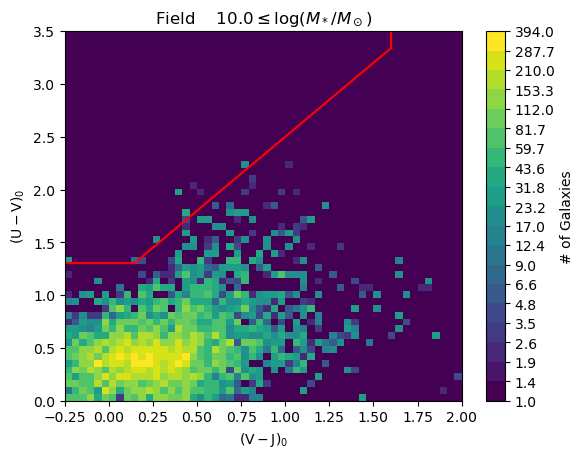

In [129]:
U_V = tot_abs[1] - tot_abs[3]
V_J = tot_abs[3] - tot_abs[4]


A = 1.4
zp = 1.1
xmin, xmax = -0.25, 2
ymin, ymax = 0, 3.5

fig, ax = plt.subplots()

xbs = np.linspace(xmin,xmax, 55)
ybs = np.linspace(ymin,ymax, 55)


# Create a 2D histogram
hist, xedges, yedges, im = ax.hist2d(V_J, U_V, bins=(xbs, ybs), norm=LogNorm())
# Define the number of discrete levels
log_min = np.log10(hist[hist > 0].min())
log_max = np.log10(hist.max())
levels = np.logspace(log_min, log_max, num=20)

# # Create a 2D histogram
# hist, xedges, yedges, im = ax.hist2d(V_J, U_V, bins=(xbs, ybs))
# # Define the number of discrete levels
# lin_min = hist.min()
# lin_max = hist.max()
# levels = np.linspace(lin_min, lin_max, num=15)


# Use a BoundaryNorm to create discrete color levels
norm = BoundaryNorm(levels, ncolors=plt.get_cmap('viridis').N, clip=True)

# Plot the 2D histogram again with the discrete norm
h = ax.hist2d(V_J, U_V, bins=(xbs, ybs), norm=norm, cmap='viridis')
fig.colorbar(h[3], ax=ax, ticks=levels, label="# of Galaxies")


ax.set(xlim=(xmin, xmax), ylim=(ymin,ymax), xlabel=r"$\rm (V-J)_0$", ylabel=r"$\rm (U-V)_0$"
       , title=r"Field    $ 10.0 \leq \log(M_*/M_\odot)$")



## Plot lines ##
UV_min = A*1.6 + zp
VJ_max = (1.3-zp)/A
print(VJ_max)
h_line = np.linspace(xmin,VJ_max,10)
v_line = np.linspace(UV_min, ymax, 10)
d_line = np.linspace(VJ_max, 1.6, 10)

ax.plot(h_line, [1.3]*10, color='red')
ax.plot([1.6]*10, v_line, color='red')
ax.plot(d_line, A*d_line + zp, color='red')

print(UV_min)
plt.show()

---
---
---
---
---
